In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from lstm_vae import create_lstm_vae

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def Read(file_name):
    with open(file_name, "r") as fh:
        A = []
        for line in fh:
            p = line.split()
            A.append([float(p[0]), float(p[1])])
#         while len(A) < 350000:
#             A.append([0, 0])
        A = A[:10000]
            
        return A

In [3]:
Data_dir = "H:\Data Science and Analytics\Projects\BTP\Data"
Log_dir = "H:\Data Science and Analytics\Projects\BTP\Log"
file_list = [f for f in os.listdir(Data_dir) if f.endswith('.dat')]

train_df = []
for fname in file_list:
    A = Read(os.path.join(Data_dir, fname))  
    train_df.append(A)

In [5]:
x = np.array(train_df)
print(x.shape)
x[0:5]

(56, 10000, 2)


array([[[-6.1100000e-03,  8.5500000e-03],
        [-8.5500000e-03,  1.1000000e-02],
        [-6.1100000e-03,  6.1100000e-03],
        ...,
        [-3.6600000e-03,  8.5500000e-03],
        [-6.1100000e-03,  8.5500000e-03],
        [-1.2200000e-03,  8.5500000e-03]],

       [[-1.0989011e-02,  8.5470085e-03],
        [-6.1050061e-03,  8.5470085e-03],
        [-6.1050061e-03,  8.5470085e-03],
        ...,
        [ 9.2918193e-01,  2.6214896e+00],
        [ 7.5335775e-01,  2.4578755e+00],
        [ 8.8034188e-01,  2.4114774e+00]],

       [[-6.1050061e-03,  6.1050061e-03],
        [-1.2210012e-03,  8.5470085e-03],
        [-3.6630037e-03,  1.0989011e-02],
        ...,
        [ 1.4151404e+00,  2.6483516e+00],
        [ 1.3076923e+00,  2.6263736e+00],
        [ 1.5982906e+00,  2.7631258e+00]],

       [[ 1.5152625e+00,  2.5433455e+00],
        [ 1.7277167e+00,  2.5897436e+00],
        [ 1.5201465e+00,  2.5360195e+00],
        ...,
        [ 2.3724054e+00,  9.6581197e-01],
        [ 2.479853

In [5]:
# x = np.array(train_df)
# input_dim = x.shape[-1]

# timesteps = x.shape[1]
# batch_size = 1

# vae, enc, gen = create_lstm_vae(input_dim, timesteps=timesteps, batch_size=batch_size, intermediate_dim=100,latent_dim=50, epsilon_std=1.)
# vae.fit(x, x, epochs=20)

# # serialize model to YAML
# vae1_yaml = vae.to_yaml()
# with open("vae1.yaml", "w") as yaml_file:
#     yaml_file.write(vae1_yaml)
# # serialize weights to HDF5
# vae.save_weights("vae1.h5")
# print("Saved model to disk")

Epoch 1/20
56/56 [==============================] - 211s 4s/step - loss: 2.2951
Epoch 2/20
56/56 [==============================] - 193s 3s/step - loss: 1.9675
Epoch 3/20
56/56 [==============================] - 195s 3s/step - loss: 1.7948
Epoch 4/20
56/56 [==============================] - 196s 3s/step - loss: 1.6694
Epoch 5/20
56/56 [==============================] - 197s 4s/step - loss: 1.6430
Epoch 6/20
56/56 [==============================] - 194s 3s/step - loss: 1.6293
Epoch 7/20
56/56 [==============================] - 193s 3s/step - loss: 1.6164
Epoch 8/20
56/56 [==============================] - 191s 3s/step - loss: 1.6131
Epoch 9/20
56/56 [==============================] - 191s 3s/step - loss: 1.6018
Epoch 10/20
56/56 [==============================] - 191s 3s/step - loss: 1.6160
Epoch 11/20
56/56 [==============================] - 193s 3s/step - loss: 1.6245
Epoch 12/20
56/56 [==============================] - 191s 3s/step - loss: 1.6045
Epoch 13/20
56/56 [==================

NameError: name 'plt' is not defined

[plotting...]
x: (56, 10000, 2), preds: (56, 10000, 2)


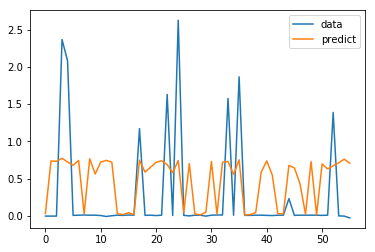

In [22]:
# load YAML and create model
yaml_file = open('vae1.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = tf.keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("vae1.h5")
print("Loaded model from disk")

preds = loaded_model.predict(x, batch_size=batch_size)

# pick a column to plot.
print("[plotting...]")
print("x: %s, preds: %s" % (x.shape, preds.shape))
plt.plot(x[:,1000,0], label='data')
plt.plot(preds[:,1000,0], label='predict')
plt.legend()
plt.show()

In [33]:
features = enc.predict(x)
df = pd.DataFrame(features, columns = ["F"+str(i) for i in range(0, 50)])
df.head

<bound method NDFrame.head of           F0        F1        F2        F3        F4        F5        F6  \
0  -0.008915 -0.003929 -0.014459 -0.008223  0.000208  0.003318 -0.003106   
1  -0.104695  0.096640  0.236966 -0.139686 -0.067728  0.105059 -0.330620   
2  -0.047408  0.136114  0.231810 -0.076306 -0.065588  0.068246 -0.282561   
3  -0.112590  0.262164  0.319928 -0.233086 -0.117939  0.215581 -0.387467   
4  -0.083718  0.192685  0.314438 -0.200053 -0.103183  0.198975 -0.443163   
5  -0.062921  0.017759  0.130663 -0.022022 -0.026757 -0.006680 -0.167197   
6  -0.116264  0.166479  0.299573 -0.185426 -0.093556  0.173478 -0.389194   
7  -0.009377 -0.002916 -0.013448 -0.009305 -0.000277  0.004178 -0.004338   
8  -0.090234  0.279564  0.320966 -0.212355 -0.121389  0.202489 -0.373539   
9   0.060284 -0.041347  0.031788  0.022917  0.041163 -0.171709 -0.104638   
10 -0.099991  0.107098  0.247662 -0.144455 -0.071433  0.113604 -0.341440   
11 -0.066742  0.131418  0.155487 -0.112173 -0.062168  0.09